In [37]:
from roboflow import Roboflow

In [38]:
rf= Roboflow(api_key="Y9UjYJSYyE54rTTrYgX7")
project= rf.workspace("phamumbaiuni").project("axialmri")
version = project.version(1)
dataset= version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [39]:
dataset

In [55]:
import inference
import os

In [56]:
model = inference.get_model("axialmri/1", api_key="Y9UjYJSYyE54rTTrYgX7")

In [57]:
testPath= os.listdir("./axialMri-1/test")
testPath

['images', 'labels']

In [64]:
validationPath = "./axialMri-1/valid/images/"

In [65]:
validImagesPath = os.listdir(validationPath)
validImagesPath

['00273_103_jpg.rf.b5eacab27065a9ef74d26add84b75457.jpg',
 '00158_90_jpg.rf.edc5aa5aec39a1ec0b090d0b6e5d9464.jpg',
 '00165_118_jpg.rf.fbe5e2058a968c3ec7dcc62cc9a2fe3b.jpg',
 '00254_79_jpg.rf.160b542c0925ba95db95dd8c5e6b7a3d.jpg',
 '00281_104_jpg.rf.50b2a782e76f24163ef09d3aafa16bd4.jpg',
 '00081_107_jpg.rf.bd3ed7dbb62d499b8d37f0b8488e67b8.jpg',
 '00104_19_jpg.rf.6dafaa72a6ff2cbe4491632539a086d4.jpg',
 '00084_145_jpg.rf.ca54511468c7323f1ed74faf699ccde2.jpg',
 '00260_130_jpg.rf.61dd76fe3d72a12f62a9c75ef46fe878.jpg',
 '00099_130_jpg.rf.30424a0532bac6dcbdbd4f1091eb8201.jpg',
 '00270_12_jpg.rf.67675db9cc7aa96eeff4693b70d682ca.jpg',
 '00022_79_jpg.rf.fe82fab33f9f48a10a021adc066e5497.jpg',
 '00150_11_jpg.rf.8a9e4b4c4d81a0d26feefbdd8a4865c4.jpg',
 '00338_15_jpg.rf.3cf27ae2fd9e58aa2704a48715c33eca.jpg',
 '00359_116_jpg.rf.da95c570022aad83bff1f6ff09705b0e.jpg',
 '00116_11_jpg.rf.3c5a10546c2a8307b6bc7d7fa2999e58.jpg',
 '00294_22_jpg.rf.dd7a175b6748b34218c89d9280ad9aa7.jpg',
 '00260_121_jpg.rf.d33c

In [66]:
validationImagePath = validImagesPath[0]
validationImagePath

'00273_103_jpg.rf.b5eacab27065a9ef74d26add84b75457.jpg'

In [67]:
validationPath+validImagesPath[0]

'./axialMri-1/valid/images/00273_103_jpg.rf.b5eacab27065a9ef74d26add84b75457.jpg'

In [68]:
result = model.infer(validationPath+validImagesPath[0], model_id="axialmri/1")

In [69]:
result[0]

ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=640, height=640), predictions=[ObjectDetectionPrediction(x=467.5, y=301.0, width=101.0, height=110.0, confidence=0.7591586112976074, class_name='negative', class_confidence=None, class_id=0, tracker_id=None, detection_id='cb5e9434-a69e-4529-8b50-cca7facec0ca', parent_id=None)])

In [80]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


In [101]:
plt.figure(figsize=(20,20))
j=1

<Figure size 2000x2000 with 0 Axes>

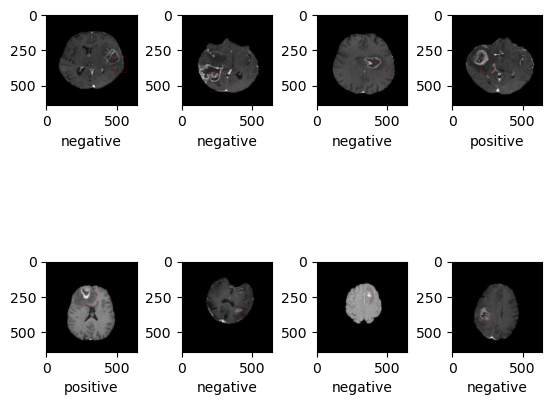

In [102]:
for imagePath in validImagesPath:
    if j>8:
        break
    plt.subplot(2,4,j)
    plt.subplots_adjust(wspace=0.5, hspace=1)
    imgpath = validationPath+imagePath
    result = model.infer(validationPath+imagePath, model_id="axialmri/1")
    if len(result[0].predictions)>0:
        im = Image.open(imgpath)
        draw_img= ImageDraw.Draw(im)
        predResult = result[0].predictions[0]
        # x1=result[0].predictions[0].x
        # y1=result[0].predictions[0].y
        x1=predResult.x
        y1= predResult.y
        width = predResult.width
        height= predResult.height
        className = predResult.class_name
        x2=x1+width
        y2=y1+height
        draw_img.rectangle([x1, y1, x2,y2], outline="red")
        plt.imshow(im)
        plt.xlabel(className)
        j+=1